## 3.1 Data Loading and Preprocessing (5 Marks)

### 1. Loading Data
To load the dataset, I created the `MultiLabelMNISTDataset` class. This class reads images from subfolders, where each subfolder name represents the label for the images it contains. The implementation ensures that the model can learn from the actual labels associated with each image.

### 2. One-Hot Encoding
I implemented the `create_one_hot_encoding` function to convert string labels into one-hot encoded vectors. This function takes a label string, pads it to a maximum length of three digits, and creates a tensor where each digit is represented as a one-hot vector. This allows the model to understand that each digit can be present independently in an image.

### 3. Reusing the Dataset Class
I reused the `MultiLabelMNISTDataset` class to create train, validation, and test loaders. This class handles the loading of images and their corresponding one-hot encoded labels, ensuring that the data is prepared correctly for training the model.

## 3.2 Implement the MultiLabelCNN Class (15 Marks)

### 1. Defining Layers
In the `MultiLabelCNN` class, I defined the architecture of the CNN, which includes convolutional layers, activation functions (ReLU), pooling layers (MaxPool2d), and dropout layers. The number of convolutional layers is configurable, allowing for flexibility in the model's complexity.

### 2. Implementing the Forward Method
The `forward` method processes the input data through the defined layers sequentially. After passing through the convolutional layers, the output is flattened and passed through fully connected layers. The final output is reshaped to accommodate the multi-label classification task, and a sigmoid activation function is applied to produce probabilities for each class.

### 3. Activation Function After Last Layer
 I used a sigmoid activation function after the last linear layer. This choice is crucial for multi-label classification because it allows the model to output probabilities for each digit independently, indicating the presence or absence of each digit in the input image. This is different from single-label classification, where a softmax function would be used to select one class from multiple options.


 In the multi-label classification model, an additional activation function is required after the last linear layer, specifically the sigmoid function. This is because each input can be associated with multiple labels independently, and the sigmoid function outputs probabilities for each class in the range of [0, 1]. This allows the model to indicate the presence or absence of each digit independently, which is essential for multi-label tasks. Unlike single-label classification, where the softmax function is used to ensure that the probabilities sum to one, the sigmoid function enables the model to handle multiple active labels simultaneously, making it the appropriate choice for this architecture.


In [2]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torch.optim.lr_scheduler import ReduceLROnPlateau
# import torchvision.transforms as transforms
# from torch.utils.data import Dataset, DataLoader
# import os
# import matplotlib.pyplot as plt
# import numpy as np
# from PIL import Image
# import logging
# from tqdm import tqdm
# from sklearn.metrics import hamming_loss

# # Setup logging
# logging.basicConfig(level=logging.INFO)
# logger = logging.getLogger(__name__)
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# print(f"Using device: {device}")

# def create_one_hot_encoding(label_str, max_digits=3, num_classes=10):
#     """Convert string label to one-hot encoded matrix."""
#     if not isinstance(label_str, (str, int)):
#         raise ValueError("Label must be string or integer")
    
#     encoding = torch.zeros(max_digits, num_classes)
#     label_str = str(label_str).zfill(max_digits)
    
#     if not label_str.isdigit():
#         raise ValueError("Label must contain only digits")
        
#     for i, digit in enumerate(label_str[-max_digits:]):
#         encoding[i][int(digit)] = 1
#     return encoding

# class MultiLabelMNISTDataset(Dataset):
#     def __init__(self, data_dir, transform=None, max_digits=3):
#         self.data_dir = data_dir
#         self.transform = transform
#         self.max_digits = max_digits
#         self.images = []
#         self.labels = []
        
#         for folder in os.listdir(data_dir):
#             folder_path = os.path.join(data_dir, folder)
#             if os.path.isdir(folder_path):
#                 try:
#                     label_tensor = create_one_hot_encoding(folder)
#                     for img_name in os.listdir(folder_path):
#                         if img_name.endswith(('.png', '.jpg', '.jpeg')):
#                             img_path = os.path.join(folder_path, img_name)
#                             self.images.append(img_path)
#                             self.labels.append(label_tensor)
#                 except Exception as e:
#                     logger.warning(f"Skipping invalid folder {folder}: {e}")
        
#         logger.info(f"Loaded {len(self.images)} images from {data_dir}")
    
#     def __len__(self):
#         return len(self.images)
    
#     def __getitem__(self, idx):
#         try:
#             img_path = self.images[idx]
#             image = Image.open(img_path).convert('L')
#             label = self.labels[idx]
            
#             if self.transform:
#                 image = self.transform(image)
            
#             return image, label
#         except Exception as e:
#             logger.error(f"Error loading image {img_path}: {e}")
#             return torch.zeros((1, 28, 28)), torch.zeros(self.max_digits, 10)

# class MultiLabelCNN(nn.Module):
#     def __init__(self, num_conv_layers=3, dropout_rate=0.5, max_digits=3, num_classes=10):
#         super(MultiLabelCNN, self).__init__()
#         self.max_digits = max_digits
#         self.num_classes = num_classes
#         self.channels = [32, 64, 128][:num_conv_layers]
        
#         # Convolutional layers
#         self.conv_layers = nn.ModuleList()
#         in_channels = 1
        
#         size = 28  # Initial image size
#         for out_channels in self.channels:
#             conv_block = nn.Sequential(
#                 nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
#                 nn.BatchNorm2d(out_channels),
#                 nn.ReLU(),
#                 nn.MaxPool2d(2),
#                 nn.Dropout2d(dropout_rate)
#             )
#             self.conv_layers.append(conv_block)
#             in_channels = out_channels
#             size = size // 2
        
#         self.feature_size = self.channels[-1] * size * size
        
#         # Fully connected layers
#         self.fc1 = nn.Linear(self.feature_size, 512)
#         self.batch_norm = nn.BatchNorm1d(512)
#         self.dropout = nn.Dropout(dropout_rate)
#         self.fc2 = nn.Linear(512, max_digits * num_classes)
    
#     def forward(self, x):
#         for conv_block in self.conv_layers:
#             x = conv_block(x)
        
#         x = x.view(x.size(0), -1)
#         x = self.fc1(x)
#         x = self.batch_norm(x)
#         x = torch.relu(x)
#         x = self.dropout(x)
#         x = self.fc2(x)
#         x = x.view(-1, self.max_digits, self.num_classes)
#         x = torch.sigmoid(x)
        
#         return x
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import logging
from tqdm import tqdm
from sklearn.metrics import hamming_loss

# Setup logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

def create_one_hot_encoding(label_str, max_digits=3, num_classes=10):
    """Convert string label to one-hot encoded matrix."""
    if not isinstance(label_str, (str, int)):
        raise ValueError("Label must be string or integer")
    
    encoding = torch.zeros(max_digits, num_classes)
    label_str = str(label_str).zfill(max_digits)
    
    if not label_str.isdigit():
        raise ValueError("Label must contain only digits")
        
    for i, digit in enumerate(label_str[-max_digits:]):
        encoding[i][int(digit)] = 1
    return encoding

class MultiLabelMNISTDataset(Dataset):
    def __init__(self, data_dir, transform=None, max_digits=3):
        self.data_dir = data_dir
        self.transform = transform
        self.max_digits = max_digits
        self.images = []
        self.labels = []
        
        for folder in os.listdir(data_dir):
            folder_path = os.path.join(data_dir, folder)
            if os.path.isdir(folder_path):
                try:
                    label_tensor = create_one_hot_encoding(folder)
                    for img_name in os.listdir(folder_path):
                        if img_name.endswith(('.png', '.jpg', '.jpeg')):
                            img_path = os.path.join(folder_path, img_name)
                            self.images.append(img_path)
                            self.labels.append(label_tensor)
                except Exception as e:
                    logger.warning(f"Skipping invalid folder {folder}: {e}")
        
        logger.info(f"Loaded {len(self.images)} images from {data_dir}")
    
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, idx):
        try:
            img_path = self.images[idx]
            image = Image.open(img_path).convert('L')
            label = self.labels[idx]
            
            if self.transform:
                image = self.transform(image)
            
            return image, label
        except Exception as e:
            logger.error(f"Error loading image {img_path}: {e}")
            return torch.zeros((1, 28, 28)), torch.zeros(self.max_digits, 10)

def load_mnist_data(base_dir):
    """Load the MNIST dataset and return train, validation, and test datasets."""
    transform = transforms.Compose([
        transforms.Resize((28, 28)),
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])
    
    train_dataset = MultiLabelMNISTDataset(os.path.join(base_dir, 'train'), transform)
    val_dataset = MultiLabelMNISTDataset(os.path.join(base_dir, 'val'), transform)
    test_dataset = MultiLabelMNISTDataset(os.path.join(base_dir, 'test'), transform)
    
    # Print dataset shapes
    logger.info(f"Train dataset size: {len(train_dataset)}")
    logger.info(f"Validation dataset size: {len(val_dataset)}")
    logger.info(f"Test dataset size: {len(test_dataset)}")
    
    return train_dataset, val_dataset, test_dataset

class MultiLabelCNN(nn.Module):
    def __init__(self, num_conv_layers=3, dropout_rate=0.5, max_digits=3, num_classes=10):
        super(MultiLabelCNN, self).__init__()
        self.max_digits = max_digits
        self.num_classes = num_classes
        self.channels = [32, 64, 128][:num_conv_layers]
        
        # Convolutional layers
        self.conv_layers = nn.ModuleList()
        in_channels = 1
        
        size = 28  # Initial image size
        for out_channels in self.channels:
            conv_block = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
                nn.BatchNorm2d(out_channels),
                nn.ReLU(),
                nn.MaxPool2d(2),
                nn.Dropout2d(dropout_rate)
            )
            self.conv_layers.append(conv_block)
            in_channels = out_channels
            size = size // 2
        
        self.feature_size = self.channels[-1] * size * size
        
        # Fully connected layers
        self.fc1 = nn.Linear(self.feature_size, 512)
        self.batch_norm = nn.BatchNorm1d(512)
        self.dropout = nn.Dropout(dropout_rate)
        self.fc2 = nn.Linear(512, max_digits * num_classes)
    
    def forward(self, x):
        for conv_block in self.conv_layers:
            x = conv_block(x)
        
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.batch_norm(x)
        x = torch.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = x.view(-1, self.max_digits, self.num_classes)
        x = torch.sigmoid(x)  # Sigmoid for multi-label classification
        
        return x


Using device: cuda


INFO:__main__:Loaded 12600 images from ../../data/external/double_mnist/train
INFO:__main__:Loaded 3000 images from ../../data/external/double_mnist/val
INFO:__main__:Loaded 4600 images from ../../data/external/double_mnist/test



Training with configuration 1: {'lr': 0.001, 'dropout': 0.5, 'optimizer': 'adam', 'epochs': 30, 'conv_layers': 3}


Epoch 1/30: 100%|██████████| 394/394 [00:06<00:00, 58.80it/s]


Epoch 1/30:
Train Loss: 0.2538, Train Exact: 0.0044, Train Hamming: 0.9219
Val Loss: 0.2422, Val Exact: 0.0000, Val Hamming: 0.9288


Epoch 2/30: 100%|██████████| 394/394 [00:04<00:00, 91.34it/s]


Epoch 2/30:
Train Loss: 0.2288, Train Exact: 0.0185, Train Hamming: 0.9306
Val Loss: 0.2376, Val Exact: 0.0332, Val Hamming: 0.9317


Epoch 3/30: 100%|██████████| 394/394 [00:05<00:00, 65.81it/s]


Epoch 3/30:
Train Loss: 0.2212, Train Exact: 0.0270, Train Hamming: 0.9318
Val Loss: 0.2334, Val Exact: 0.0332, Val Hamming: 0.9317


Epoch 4/30: 100%|██████████| 394/394 [00:05<00:00, 78.24it/s]


Epoch 4/30:
Train Loss: 0.2138, Train Exact: 0.0307, Train Hamming: 0.9321
Val Loss: 0.2268, Val Exact: 0.0336, Val Hamming: 0.9329


Epoch 5/30: 100%|██████████| 394/394 [00:06<00:00, 61.46it/s]


Epoch 5/30:
Train Loss: 0.2065, Train Exact: 0.0336, Train Hamming: 0.9328
Val Loss: 0.2147, Val Exact: 0.0332, Val Hamming: 0.9346


Epoch 6/30: 100%|██████████| 394/394 [00:05<00:00, 70.53it/s]


Epoch 6/30:
Train Loss: 0.2003, Train Exact: 0.0347, Train Hamming: 0.9332
Val Loss: 0.2157, Val Exact: 0.0336, Val Hamming: 0.9340


Epoch 7/30: 100%|██████████| 394/394 [00:05<00:00, 65.76it/s]


Epoch 7/30:
Train Loss: 0.1933, Train Exact: 0.0385, Train Hamming: 0.9341
Val Loss: 0.2096, Val Exact: 0.0349, Val Hamming: 0.9362


Epoch 8/30: 100%|██████████| 394/394 [00:05<00:00, 66.50it/s]


Epoch 8/30:
Train Loss: 0.1853, Train Exact: 0.0456, Train Hamming: 0.9355
Val Loss: 0.1971, Val Exact: 0.0412, Val Hamming: 0.9373


Epoch 9/30: 100%|██████████| 394/394 [00:04<00:00, 81.92it/s]


Epoch 9/30:
Train Loss: 0.1768, Train Exact: 0.0543, Train Hamming: 0.9363
Val Loss: 0.1815, Val Exact: 0.0585, Val Hamming: 0.9381


Epoch 10/30: 100%|██████████| 394/394 [00:04<00:00, 87.99it/s]


Epoch 10/30:
Train Loss: 0.1689, Train Exact: 0.0666, Train Hamming: 0.9379
Val Loss: 0.1735, Val Exact: 0.0572, Val Hamming: 0.9397


Epoch 11/30: 100%|██████████| 394/394 [00:04<00:00, 81.77it/s]


Epoch 11/30:
Train Loss: 0.1597, Train Exact: 0.0842, Train Hamming: 0.9403
Val Loss: 0.1687, Val Exact: 0.0871, Val Hamming: 0.9412


Epoch 12/30: 100%|██████████| 394/394 [00:04<00:00, 82.66it/s]


Epoch 12/30:
Train Loss: 0.1541, Train Exact: 0.1005, Train Hamming: 0.9417
Val Loss: 0.1557, Val Exact: 0.1057, Val Hamming: 0.9442


Epoch 13/30: 100%|██████████| 394/394 [00:05<00:00, 78.37it/s]


Epoch 13/30:
Train Loss: 0.1483, Train Exact: 0.1152, Train Hamming: 0.9435
Val Loss: 0.1553, Val Exact: 0.1164, Val Hamming: 0.9442


Epoch 14/30: 100%|██████████| 394/394 [00:05<00:00, 70.72it/s]


Epoch 14/30:
Train Loss: 0.1441, Train Exact: 0.1315, Train Hamming: 0.9451
Val Loss: 0.1538, Val Exact: 0.1370, Val Hamming: 0.9467


Epoch 15/30: 100%|██████████| 394/394 [00:05<00:00, 69.83it/s]


Epoch 15/30:
Train Loss: 0.1389, Train Exact: 0.1453, Train Hamming: 0.9467
Val Loss: 0.1446, Val Exact: 0.1360, Val Hamming: 0.9487


Epoch 16/30: 100%|██████████| 394/394 [00:05<00:00, 71.18it/s]


Epoch 16/30:
Train Loss: 0.1356, Train Exact: 0.1569, Train Hamming: 0.9479
Val Loss: 0.1399, Val Exact: 0.1562, Val Hamming: 0.9498


Epoch 17/30: 100%|██████████| 394/394 [00:05<00:00, 67.74it/s]


Epoch 17/30:
Train Loss: 0.1324, Train Exact: 0.1730, Train Hamming: 0.9490
Val Loss: 0.1391, Val Exact: 0.1619, Val Hamming: 0.9497


Epoch 18/30: 100%|██████████| 394/394 [00:05<00:00, 72.24it/s]


Epoch 18/30:
Train Loss: 0.1297, Train Exact: 0.1865, Train Hamming: 0.9501
Val Loss: 0.1381, Val Exact: 0.1666, Val Hamming: 0.9504


Epoch 19/30: 100%|██████████| 394/394 [00:06<00:00, 65.32it/s]


Epoch 19/30:
Train Loss: 0.1275, Train Exact: 0.1965, Train Hamming: 0.9505
Val Loss: 0.1349, Val Exact: 0.1882, Val Hamming: 0.9505


Epoch 20/30: 100%|██████████| 394/394 [00:05<00:00, 73.94it/s]


Epoch 20/30:
Train Loss: 0.1256, Train Exact: 0.2052, Train Hamming: 0.9513
Val Loss: 0.1330, Val Exact: 0.1892, Val Hamming: 0.9524


Epoch 21/30: 100%|██████████| 394/394 [00:05<00:00, 71.32it/s]


Epoch 21/30:
Train Loss: 0.1224, Train Exact: 0.2207, Train Hamming: 0.9526
Val Loss: 0.1334, Val Exact: 0.1789, Val Hamming: 0.9531


Epoch 22/30: 100%|██████████| 394/394 [00:05<00:00, 69.55it/s]


Epoch 22/30:
Train Loss: 0.1195, Train Exact: 0.2318, Train Hamming: 0.9540
Val Loss: 0.1256, Val Exact: 0.2131, Val Hamming: 0.9555


Epoch 23/30: 100%|██████████| 394/394 [00:05<00:00, 68.18it/s]


Epoch 23/30:
Train Loss: 0.1185, Train Exact: 0.2404, Train Hamming: 0.9542
Val Loss: 0.1222, Val Exact: 0.2354, Val Hamming: 0.9569


Epoch 24/30: 100%|██████████| 394/394 [00:06<00:00, 62.03it/s]


Epoch 24/30:
Train Loss: 0.1167, Train Exact: 0.2455, Train Hamming: 0.9546
Val Loss: 0.1280, Val Exact: 0.2188, Val Hamming: 0.9563


Epoch 25/30: 100%|██████████| 394/394 [00:05<00:00, 67.11it/s]


Epoch 25/30:
Train Loss: 0.1143, Train Exact: 0.2636, Train Hamming: 0.9558
Val Loss: 0.1202, Val Exact: 0.2277, Val Hamming: 0.9576


Epoch 26/30: 100%|██████████| 394/394 [00:05<00:00, 66.35it/s]


Epoch 26/30:
Train Loss: 0.1143, Train Exact: 0.2658, Train Hamming: 0.9557
Val Loss: 0.1251, Val Exact: 0.2274, Val Hamming: 0.9587


Epoch 27/30: 100%|██████████| 394/394 [00:06<00:00, 61.17it/s]


Epoch 27/30:
Train Loss: 0.1118, Train Exact: 0.2738, Train Hamming: 0.9568
Val Loss: 0.1204, Val Exact: 0.2517, Val Hamming: 0.9590


Epoch 28/30: 100%|██████████| 394/394 [00:06<00:00, 62.52it/s]


Epoch 28/30:
Train Loss: 0.1096, Train Exact: 0.2910, Train Hamming: 0.9578
Val Loss: 0.1193, Val Exact: 0.2337, Val Hamming: 0.9589


Epoch 29/30: 100%|██████████| 394/394 [00:06<00:00, 61.10it/s]


Epoch 29/30:
Train Loss: 0.1084, Train Exact: 0.2974, Train Hamming: 0.9586
Val Loss: 0.1240, Val Exact: 0.2570, Val Hamming: 0.9603


Epoch 30/30: 100%|██████████| 394/394 [00:06<00:00, 64.95it/s]


Epoch 30/30:
Train Loss: 0.1071, Train Exact: 0.3089, Train Hamming: 0.9591
Val Loss: 0.1194, Val Exact: 0.2869, Val Hamming: 0.9617


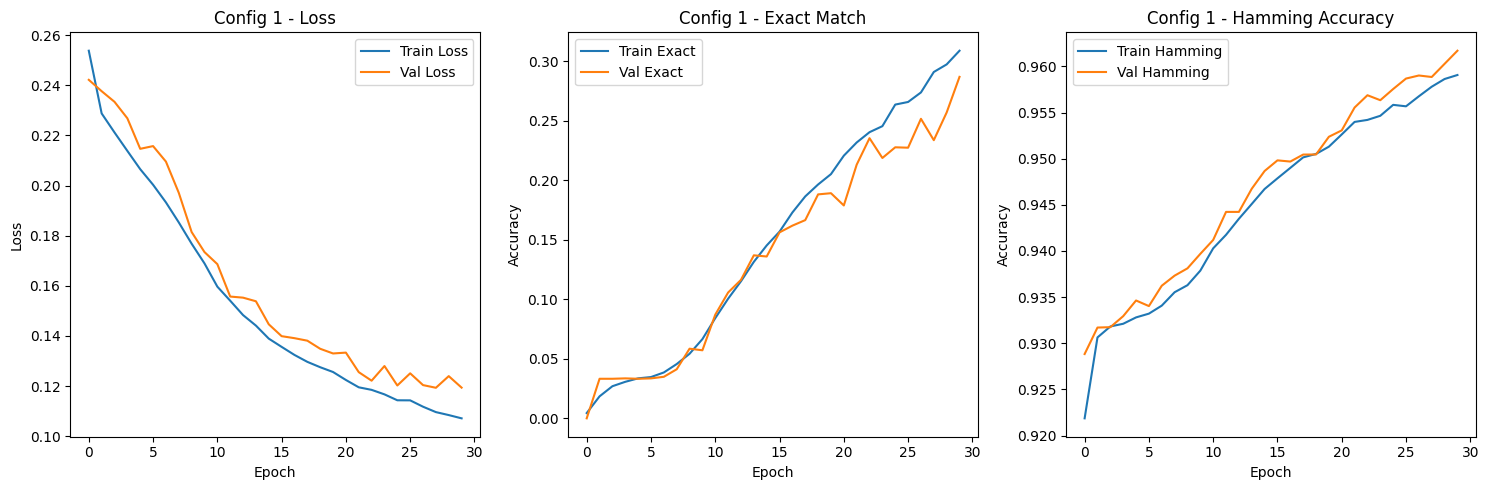


Training with configuration 2: {'lr': 0.01, 'dropout': 0.3, 'optimizer': 'sgd', 'epochs': 30, 'conv_layers': 3}


Epoch 1/30: 100%|██████████| 394/394 [00:05<00:00, 66.16it/s]


Epoch 1/30:
Train Loss: 0.2732, Train Exact: 0.0000, Train Hamming: 0.9139
Val Loss: 0.2702, Val Exact: 0.0000, Val Hamming: 0.9136


Epoch 2/30: 100%|██████████| 394/394 [00:06<00:00, 59.37it/s]


Epoch 2/30:
Train Loss: 0.2405, Train Exact: 0.0019, Train Hamming: 0.9263
Val Loss: 0.2597, Val Exact: 0.0332, Val Hamming: 0.9220


Epoch 3/30: 100%|██████████| 394/394 [00:05<00:00, 70.02it/s]


Epoch 3/30:
Train Loss: 0.2337, Train Exact: 0.0084, Train Hamming: 0.9285
Val Loss: 0.2511, Val Exact: 0.0332, Val Hamming: 0.9269


Epoch 4/30: 100%|██████████| 394/394 [00:05<00:00, 69.52it/s]


Epoch 4/30:
Train Loss: 0.2288, Train Exact: 0.0126, Train Hamming: 0.9299
Val Loss: 0.2483, Val Exact: 0.0332, Val Hamming: 0.9275


Epoch 5/30: 100%|██████████| 394/394 [00:06<00:00, 65.65it/s]


Epoch 5/30:
Train Loss: 0.2259, Train Exact: 0.0206, Train Hamming: 0.9308
Val Loss: 0.2461, Val Exact: 0.0332, Val Hamming: 0.9281


Epoch 6/30: 100%|██████████| 394/394 [00:05<00:00, 67.09it/s]


Epoch 6/30:
Train Loss: 0.2232, Train Exact: 0.0250, Train Hamming: 0.9316
Val Loss: 0.2449, Val Exact: 0.0332, Val Hamming: 0.9292


Epoch 7/30: 100%|██████████| 394/394 [00:05<00:00, 67.38it/s]


Epoch 7/30:
Train Loss: 0.2211, Train Exact: 0.0290, Train Hamming: 0.9319
Val Loss: 0.2420, Val Exact: 0.0332, Val Hamming: 0.9300


Epoch 8/30: 100%|██████████| 394/394 [00:06<00:00, 64.76it/s]


Epoch 8/30:
Train Loss: 0.2190, Train Exact: 0.0334, Train Hamming: 0.9324
Val Loss: 0.2409, Val Exact: 0.0332, Val Hamming: 0.9295


Epoch 9/30: 100%|██████████| 394/394 [00:05<00:00, 65.82it/s]


Epoch 9/30:
Train Loss: 0.2175, Train Exact: 0.0350, Train Hamming: 0.9326
Val Loss: 0.2384, Val Exact: 0.0332, Val Hamming: 0.9302


Epoch 10/30: 100%|██████████| 394/394 [00:05<00:00, 68.61it/s]


Epoch 10/30:
Train Loss: 0.2155, Train Exact: 0.0358, Train Hamming: 0.9328
Val Loss: 0.2365, Val Exact: 0.0332, Val Hamming: 0.9307


Epoch 11/30: 100%|██████████| 394/394 [00:05<00:00, 67.25it/s]


Epoch 11/30:
Train Loss: 0.2134, Train Exact: 0.0369, Train Hamming: 0.9328
Val Loss: 0.2326, Val Exact: 0.0332, Val Hamming: 0.9313


Epoch 12/30: 100%|██████████| 394/394 [00:05<00:00, 68.46it/s]


Epoch 12/30:
Train Loss: 0.2105, Train Exact: 0.0373, Train Hamming: 0.9333
Val Loss: 0.2305, Val Exact: 0.0349, Val Hamming: 0.9322


Epoch 13/30: 100%|██████████| 394/394 [00:05<00:00, 71.01it/s]


Epoch 13/30:
Train Loss: 0.2076, Train Exact: 0.0382, Train Hamming: 0.9337
Val Loss: 0.2288, Val Exact: 0.0362, Val Hamming: 0.9334


Epoch 14/30: 100%|██████████| 394/394 [00:05<00:00, 67.34it/s]


Epoch 14/30:
Train Loss: 0.2052, Train Exact: 0.0384, Train Hamming: 0.9341
Val Loss: 0.2274, Val Exact: 0.0356, Val Hamming: 0.9339


Epoch 15/30: 100%|██████████| 394/394 [00:05<00:00, 70.11it/s]


Epoch 15/30:
Train Loss: 0.2033, Train Exact: 0.0392, Train Hamming: 0.9344
Val Loss: 0.2259, Val Exact: 0.0349, Val Hamming: 0.9342


Epoch 16/30: 100%|██████████| 394/394 [00:06<00:00, 64.91it/s]


Epoch 16/30:
Train Loss: 0.2008, Train Exact: 0.0388, Train Hamming: 0.9348
Val Loss: 0.2208, Val Exact: 0.0452, Val Hamming: 0.9352


Epoch 17/30: 100%|██████████| 394/394 [00:06<00:00, 58.95it/s]


Epoch 17/30:
Train Loss: 0.1984, Train Exact: 0.0393, Train Hamming: 0.9350
Val Loss: 0.2218, Val Exact: 0.0389, Val Hamming: 0.9353


Epoch 18/30: 100%|██████████| 394/394 [00:06<00:00, 62.00it/s]


Epoch 18/30:
Train Loss: 0.1966, Train Exact: 0.0396, Train Hamming: 0.9354
Val Loss: 0.2183, Val Exact: 0.0402, Val Hamming: 0.9362


Epoch 19/30: 100%|██████████| 394/394 [00:06<00:00, 61.26it/s]


Epoch 19/30:
Train Loss: 0.1938, Train Exact: 0.0412, Train Hamming: 0.9357
Val Loss: 0.2154, Val Exact: 0.0529, Val Hamming: 0.9367


Epoch 20/30: 100%|██████████| 394/394 [00:06<00:00, 63.01it/s]


Epoch 20/30:
Train Loss: 0.1918, Train Exact: 0.0414, Train Hamming: 0.9360
Val Loss: 0.2122, Val Exact: 0.0582, Val Hamming: 0.9377


Epoch 21/30: 100%|██████████| 394/394 [00:05<00:00, 67.00it/s]


Epoch 21/30:
Train Loss: 0.1885, Train Exact: 0.0415, Train Hamming: 0.9366
Val Loss: 0.2103, Val Exact: 0.0499, Val Hamming: 0.9382


Epoch 22/30: 100%|██████████| 394/394 [00:06<00:00, 65.23it/s]


Epoch 22/30:
Train Loss: 0.1858, Train Exact: 0.0413, Train Hamming: 0.9367
Val Loss: 0.2049, Val Exact: 0.0691, Val Hamming: 0.9384


Epoch 23/30: 100%|██████████| 394/394 [00:06<00:00, 64.37it/s]


Epoch 23/30:
Train Loss: 0.1818, Train Exact: 0.0446, Train Hamming: 0.9373
Val Loss: 0.2031, Val Exact: 0.0715, Val Hamming: 0.9391


Epoch 24/30: 100%|██████████| 394/394 [00:06<00:00, 64.64it/s]


Epoch 24/30:
Train Loss: 0.1780, Train Exact: 0.0480, Train Hamming: 0.9377
Val Loss: 0.1976, Val Exact: 0.0775, Val Hamming: 0.9393


Epoch 25/30: 100%|██████████| 394/394 [00:05<00:00, 66.82it/s]


Epoch 25/30:
Train Loss: 0.1742, Train Exact: 0.0513, Train Hamming: 0.9383
Val Loss: 0.1943, Val Exact: 0.0758, Val Hamming: 0.9398


Epoch 26/30: 100%|██████████| 394/394 [00:05<00:00, 70.53it/s]


Epoch 26/30:
Train Loss: 0.1704, Train Exact: 0.0566, Train Hamming: 0.9390
Val Loss: 0.1901, Val Exact: 0.0715, Val Hamming: 0.9404


Epoch 27/30: 100%|██████████| 394/394 [00:06<00:00, 62.13it/s]


Epoch 27/30:
Train Loss: 0.1667, Train Exact: 0.0614, Train Hamming: 0.9396
Val Loss: 0.1841, Val Exact: 0.0808, Val Hamming: 0.9413


Epoch 28/30: 100%|██████████| 394/394 [00:06<00:00, 64.39it/s]


Epoch 28/30:
Train Loss: 0.1628, Train Exact: 0.0677, Train Hamming: 0.9406
Val Loss: 0.1796, Val Exact: 0.0874, Val Hamming: 0.9415


Epoch 29/30: 100%|██████████| 394/394 [00:06<00:00, 65.51it/s]


Epoch 29/30:
Train Loss: 0.1584, Train Exact: 0.0748, Train Hamming: 0.9414
Val Loss: 0.1757, Val Exact: 0.0924, Val Hamming: 0.9423


Epoch 30/30: 100%|██████████| 394/394 [00:06<00:00, 64.66it/s]


Epoch 30/30:
Train Loss: 0.1546, Train Exact: 0.0802, Train Hamming: 0.9422
Val Loss: 0.1746, Val Exact: 0.0914, Val Hamming: 0.9420


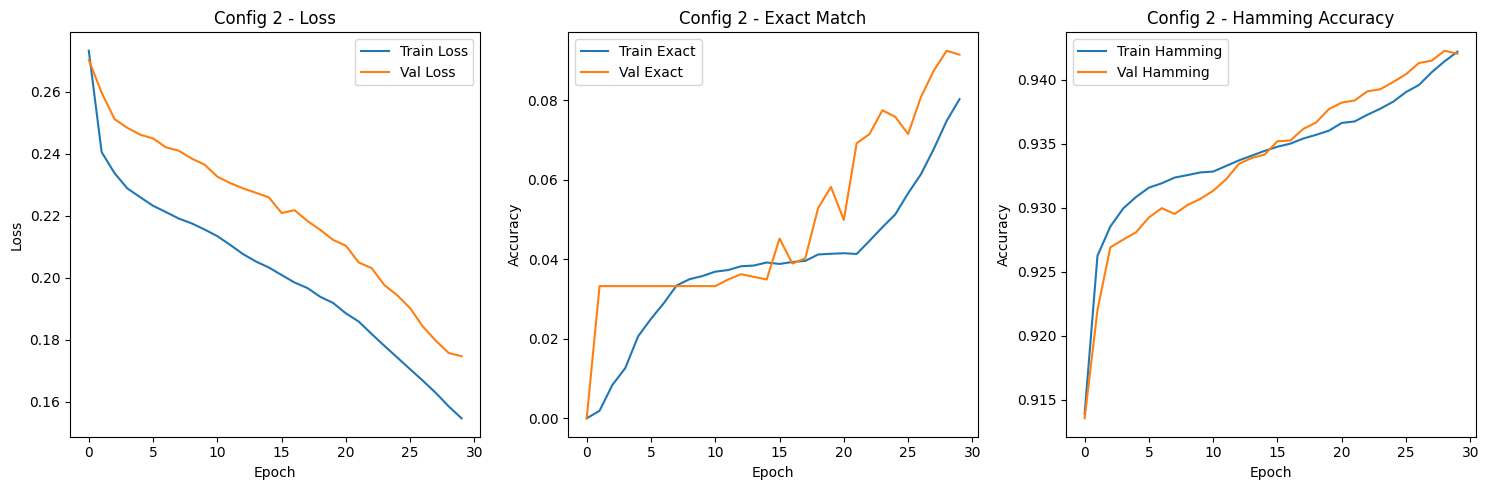


Training with configuration 3: {'lr': 0.0001, 'dropout': 0.4, 'optimizer': 'adam', 'epochs': 30, 'conv_layers': 3}


Epoch 1/30: 100%|██████████| 394/394 [00:06<00:00, 59.36it/s]


Epoch 1/30:
Train Loss: 0.3226, Train Exact: 0.0006, Train Hamming: 0.8979
Val Loss: 0.2830, Val Exact: 0.0000, Val Hamming: 0.9055


Epoch 2/30: 100%|██████████| 394/394 [00:05<00:00, 67.65it/s]


Epoch 2/30:
Train Loss: 0.2458, Train Exact: 0.0020, Train Hamming: 0.9254
Val Loss: 0.2710, Val Exact: 0.0332, Val Hamming: 0.9126


Epoch 3/30: 100%|██████████| 394/394 [00:06<00:00, 62.65it/s]


Epoch 3/30:
Train Loss: 0.2368, Train Exact: 0.0078, Train Hamming: 0.9282
Val Loss: 0.2564, Val Exact: 0.0000, Val Hamming: 0.9215


Epoch 4/30: 100%|██████████| 394/394 [00:06<00:00, 60.92it/s]


Epoch 4/30:
Train Loss: 0.2314, Train Exact: 0.0135, Train Hamming: 0.9299
Val Loss: 0.2476, Val Exact: 0.0332, Val Hamming: 0.9265


Epoch 5/30: 100%|██████████| 394/394 [00:06<00:00, 57.00it/s]


Epoch 5/30:
Train Loss: 0.2272, Train Exact: 0.0210, Train Hamming: 0.9310
Val Loss: 0.2449, Val Exact: 0.0332, Val Hamming: 0.9283


Epoch 6/30: 100%|██████████| 394/394 [00:06<00:00, 61.07it/s]


Epoch 6/30:
Train Loss: 0.2245, Train Exact: 0.0256, Train Hamming: 0.9317
Val Loss: 0.2418, Val Exact: 0.0332, Val Hamming: 0.9296


Epoch 7/30: 100%|██████████| 394/394 [00:06<00:00, 60.77it/s]


Epoch 7/30:
Train Loss: 0.2219, Train Exact: 0.0295, Train Hamming: 0.9322
Val Loss: 0.2388, Val Exact: 0.0332, Val Hamming: 0.9307


Epoch 8/30: 100%|██████████| 394/394 [00:06<00:00, 63.22it/s]


Epoch 8/30:
Train Loss: 0.2194, Train Exact: 0.0317, Train Hamming: 0.9325
Val Loss: 0.2355, Val Exact: 0.0332, Val Hamming: 0.9309


Epoch 9/30: 100%|██████████| 394/394 [00:06<00:00, 59.32it/s]


Epoch 9/30:
Train Loss: 0.2172, Train Exact: 0.0328, Train Hamming: 0.9326
Val Loss: 0.2319, Val Exact: 0.0332, Val Hamming: 0.9313


Epoch 10/30: 100%|██████████| 394/394 [00:06<00:00, 62.55it/s]


Epoch 10/30:
Train Loss: 0.2146, Train Exact: 0.0346, Train Hamming: 0.9327
Val Loss: 0.2288, Val Exact: 0.0332, Val Hamming: 0.9322


Epoch 11/30: 100%|██████████| 394/394 [00:06<00:00, 61.48it/s]


Epoch 11/30:
Train Loss: 0.2114, Train Exact: 0.0344, Train Hamming: 0.9329
Val Loss: 0.2253, Val Exact: 0.0336, Val Hamming: 0.9329


Epoch 12/30: 100%|██████████| 394/394 [00:06<00:00, 62.15it/s]


Epoch 12/30:
Train Loss: 0.2075, Train Exact: 0.0363, Train Hamming: 0.9336
Val Loss: 0.2231, Val Exact: 0.0336, Val Hamming: 0.9342


Epoch 13/30: 100%|██████████| 394/394 [00:06<00:00, 59.62it/s]


Epoch 13/30:
Train Loss: 0.2048, Train Exact: 0.0369, Train Hamming: 0.9340
Val Loss: 0.2211, Val Exact: 0.0352, Val Hamming: 0.9351


Epoch 14/30: 100%|██████████| 394/394 [00:06<00:00, 56.89it/s]


Epoch 14/30:
Train Loss: 0.2018, Train Exact: 0.0361, Train Hamming: 0.9344
Val Loss: 0.2210, Val Exact: 0.0352, Val Hamming: 0.9353


Epoch 15/30: 100%|██████████| 394/394 [00:07<00:00, 55.73it/s]


Epoch 15/30:
Train Loss: 0.1982, Train Exact: 0.0374, Train Hamming: 0.9351
Val Loss: 0.2162, Val Exact: 0.0439, Val Hamming: 0.9362


Epoch 16/30: 100%|██████████| 394/394 [00:06<00:00, 57.16it/s]


Epoch 16/30:
Train Loss: 0.1954, Train Exact: 0.0373, Train Hamming: 0.9355
Val Loss: 0.2149, Val Exact: 0.0436, Val Hamming: 0.9369


Epoch 17/30: 100%|██████████| 394/394 [00:06<00:00, 57.53it/s]


Epoch 17/30:
Train Loss: 0.1931, Train Exact: 0.0388, Train Hamming: 0.9357
Val Loss: 0.2115, Val Exact: 0.0489, Val Hamming: 0.9379


Epoch 18/30: 100%|██████████| 394/394 [00:06<00:00, 60.24it/s]


Epoch 18/30:
Train Loss: 0.1900, Train Exact: 0.0402, Train Hamming: 0.9363
Val Loss: 0.2090, Val Exact: 0.0515, Val Hamming: 0.9382


Epoch 19/30: 100%|██████████| 394/394 [00:06<00:00, 60.26it/s]


Epoch 19/30:
Train Loss: 0.1873, Train Exact: 0.0395, Train Hamming: 0.9368
Val Loss: 0.2080, Val Exact: 0.0529, Val Hamming: 0.9381


Epoch 20/30: 100%|██████████| 394/394 [00:06<00:00, 60.50it/s]


Epoch 20/30:
Train Loss: 0.1841, Train Exact: 0.0396, Train Hamming: 0.9372
Val Loss: 0.2045, Val Exact: 0.0492, Val Hamming: 0.9390


Epoch 21/30: 100%|██████████| 394/394 [00:06<00:00, 60.23it/s]


Epoch 21/30:
Train Loss: 0.1811, Train Exact: 0.0423, Train Hamming: 0.9376
Val Loss: 0.1988, Val Exact: 0.0638, Val Hamming: 0.9394


Epoch 22/30: 100%|██████████| 394/394 [00:06<00:00, 57.98it/s]


Epoch 22/30:
Train Loss: 0.1777, Train Exact: 0.0439, Train Hamming: 0.9377
Val Loss: 0.1974, Val Exact: 0.0662, Val Hamming: 0.9386


Epoch 23/30: 100%|██████████| 394/394 [00:06<00:00, 63.03it/s]


Epoch 23/30:
Train Loss: 0.1746, Train Exact: 0.0478, Train Hamming: 0.9383
Val Loss: 0.1943, Val Exact: 0.0625, Val Hamming: 0.9393


Epoch 24/30: 100%|██████████| 394/394 [00:06<00:00, 63.28it/s]


Epoch 24/30:
Train Loss: 0.1716, Train Exact: 0.0498, Train Hamming: 0.9387
Val Loss: 0.1887, Val Exact: 0.0755, Val Hamming: 0.9398


Epoch 25/30: 100%|██████████| 394/394 [00:06<00:00, 60.86it/s]


Epoch 25/30:
Train Loss: 0.1680, Train Exact: 0.0545, Train Hamming: 0.9389
Val Loss: 0.1866, Val Exact: 0.0701, Val Hamming: 0.9397


Epoch 26/30: 100%|██████████| 394/394 [00:06<00:00, 59.11it/s]


Epoch 26/30:
Train Loss: 0.1649, Train Exact: 0.0595, Train Hamming: 0.9396
Val Loss: 0.1813, Val Exact: 0.0778, Val Hamming: 0.9399


Epoch 27/30: 100%|██████████| 394/394 [00:06<00:00, 65.38it/s]


Epoch 27/30:
Train Loss: 0.1612, Train Exact: 0.0660, Train Hamming: 0.9405
Val Loss: 0.1790, Val Exact: 0.0824, Val Hamming: 0.9401


Epoch 28/30: 100%|██████████| 394/394 [00:06<00:00, 60.86it/s]


Epoch 28/30:
Train Loss: 0.1573, Train Exact: 0.0732, Train Hamming: 0.9411
Val Loss: 0.1737, Val Exact: 0.0828, Val Hamming: 0.9412


Epoch 29/30: 100%|██████████| 394/394 [00:05<00:00, 66.15it/s]


Epoch 29/30:
Train Loss: 0.1539, Train Exact: 0.0793, Train Hamming: 0.9422
Val Loss: 0.1703, Val Exact: 0.0874, Val Hamming: 0.9416


Epoch 30/30: 100%|██████████| 394/394 [00:06<00:00, 64.49it/s]


Epoch 30/30:
Train Loss: 0.1519, Train Exact: 0.0842, Train Hamming: 0.9427
Val Loss: 0.1662, Val Exact: 0.0918, Val Hamming: 0.9420


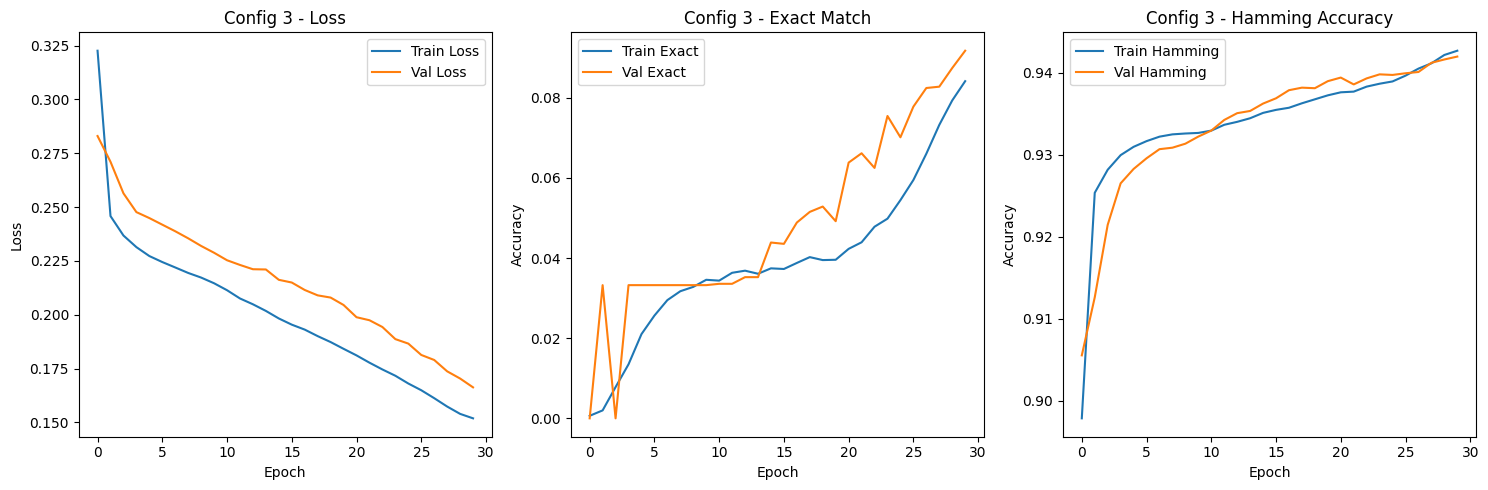


Training with configuration 4: {'lr': 0.005, 'dropout': 0.6, 'optimizer': 'adam', 'epochs': 30, 'conv_layers': 2}


Epoch 1/30: 100%|██████████| 394/394 [00:06<00:00, 58.40it/s]


Epoch 1/30:
Train Loss: 0.2518, Train Exact: 0.0085, Train Hamming: 0.9253
Val Loss: 0.2576, Val Exact: 0.0332, Val Hamming: 0.9306


Epoch 2/30: 100%|██████████| 394/394 [00:06<00:00, 62.68it/s]


Epoch 2/30:
Train Loss: 0.2310, Train Exact: 0.0209, Train Hamming: 0.9308
Val Loss: 0.2445, Val Exact: 0.0332, Val Hamming: 0.9321


Epoch 3/30: 100%|██████████| 394/394 [00:05<00:00, 66.27it/s]


Epoch 3/30:
Train Loss: 0.2240, Train Exact: 0.0285, Train Hamming: 0.9322
Val Loss: 0.2375, Val Exact: 0.0332, Val Hamming: 0.9322


Epoch 4/30: 100%|██████████| 394/394 [00:04<00:00, 79.13it/s]


Epoch 4/30:
Train Loss: 0.2197, Train Exact: 0.0309, Train Hamming: 0.9325
Val Loss: 0.2340, Val Exact: 0.0332, Val Hamming: 0.9322


Epoch 5/30: 100%|██████████| 394/394 [00:05<00:00, 78.10it/s]


Epoch 5/30:
Train Loss: 0.2170, Train Exact: 0.0337, Train Hamming: 0.9327
Val Loss: 0.2425, Val Exact: 0.0000, Val Hamming: 0.9282


Epoch 6/30: 100%|██████████| 394/394 [00:05<00:00, 74.47it/s]


Epoch 6/30:
Train Loss: 0.2128, Train Exact: 0.0341, Train Hamming: 0.9326
Val Loss: 0.2250, Val Exact: 0.0332, Val Hamming: 0.9322


Epoch 7/30: 100%|██████████| 394/394 [00:05<00:00, 72.03it/s]


Epoch 7/30:
Train Loss: 0.2075, Train Exact: 0.0332, Train Hamming: 0.9330
Val Loss: 0.2181, Val Exact: 0.0369, Val Hamming: 0.9323


Epoch 8/30: 100%|██████████| 394/394 [00:05<00:00, 71.32it/s]


Epoch 8/30:
Train Loss: 0.2021, Train Exact: 0.0340, Train Hamming: 0.9339
Val Loss: 0.2156, Val Exact: 0.0003, Val Hamming: 0.9329


Epoch 9/30: 100%|██████████| 394/394 [00:05<00:00, 74.52it/s]


Epoch 9/30:
Train Loss: 0.1977, Train Exact: 0.0361, Train Hamming: 0.9342
Val Loss: 0.2389, Val Exact: 0.0000, Val Hamming: 0.9259


Epoch 10/30: 100%|██████████| 394/394 [00:05<00:00, 73.69it/s]


Epoch 10/30:
Train Loss: 0.1956, Train Exact: 0.0377, Train Hamming: 0.9343
Val Loss: 0.2123, Val Exact: 0.0495, Val Hamming: 0.9360


Epoch 11/30: 100%|██████████| 394/394 [00:05<00:00, 69.40it/s]


Epoch 11/30:
Train Loss: 0.1910, Train Exact: 0.0418, Train Hamming: 0.9348
Val Loss: 0.2439, Val Exact: 0.0000, Val Hamming: 0.9261


Epoch 12/30: 100%|██████████| 394/394 [00:04<00:00, 84.14it/s]


Epoch 12/30:
Train Loss: 0.1878, Train Exact: 0.0451, Train Hamming: 0.9349
Val Loss: 0.2062, Val Exact: 0.0562, Val Hamming: 0.9328


Epoch 13/30: 100%|██████████| 394/394 [00:04<00:00, 85.49it/s]


Epoch 13/30:
Train Loss: 0.1836, Train Exact: 0.0482, Train Hamming: 0.9356
Val Loss: 0.2066, Val Exact: 0.0472, Val Hamming: 0.9332


Epoch 14/30: 100%|██████████| 394/394 [00:04<00:00, 85.92it/s]


Epoch 14/30:
Train Loss: 0.1806, Train Exact: 0.0538, Train Hamming: 0.9359
Val Loss: 0.2036, Val Exact: 0.0422, Val Hamming: 0.9349


Epoch 15/30: 100%|██████████| 394/394 [00:04<00:00, 84.03it/s]


Epoch 15/30:
Train Loss: 0.1781, Train Exact: 0.0581, Train Hamming: 0.9365
Val Loss: 0.1989, Val Exact: 0.0146, Val Hamming: 0.9344


Epoch 16/30: 100%|██████████| 394/394 [00:06<00:00, 65.38it/s]


Epoch 16/30:
Train Loss: 0.1754, Train Exact: 0.0602, Train Hamming: 0.9366
Val Loss: 0.1945, Val Exact: 0.0529, Val Hamming: 0.9354


Epoch 17/30: 100%|██████████| 394/394 [00:05<00:00, 74.52it/s]


Epoch 17/30:
Train Loss: 0.1728, Train Exact: 0.0643, Train Hamming: 0.9372
Val Loss: 0.1981, Val Exact: 0.0662, Val Hamming: 0.9359


Epoch 18/30: 100%|██████████| 394/394 [00:05<00:00, 70.07it/s]


Epoch 18/30:
Train Loss: 0.1716, Train Exact: 0.0687, Train Hamming: 0.9376
Val Loss: 0.1930, Val Exact: 0.0655, Val Hamming: 0.9364


Epoch 19/30: 100%|██████████| 394/394 [00:06<00:00, 65.65it/s]


Epoch 19/30:
Train Loss: 0.1690, Train Exact: 0.0709, Train Hamming: 0.9380
Val Loss: 0.1992, Val Exact: 0.0422, Val Hamming: 0.9350


Epoch 20/30: 100%|██████████| 394/394 [00:05<00:00, 67.90it/s]


Epoch 20/30:
Train Loss: 0.1666, Train Exact: 0.0798, Train Hamming: 0.9388
Val Loss: 0.2004, Val Exact: 0.0459, Val Hamming: 0.9346


Epoch 21/30: 100%|██████████| 394/394 [00:06<00:00, 63.51it/s]


Epoch 21/30:
Train Loss: 0.1656, Train Exact: 0.0778, Train Hamming: 0.9390
Val Loss: 0.1878, Val Exact: 0.0642, Val Hamming: 0.9358


Epoch 22/30: 100%|██████████| 394/394 [00:06<00:00, 60.98it/s]


Epoch 22/30:
Train Loss: 0.1648, Train Exact: 0.0826, Train Hamming: 0.9391
Val Loss: 0.1887, Val Exact: 0.0625, Val Hamming: 0.9364


Epoch 23/30: 100%|██████████| 394/394 [00:06<00:00, 60.78it/s]


Epoch 23/30:
Train Loss: 0.1623, Train Exact: 0.0843, Train Hamming: 0.9395
Val Loss: 0.1809, Val Exact: 0.0748, Val Hamming: 0.9384


Epoch 24/30: 100%|██████████| 394/394 [00:05<00:00, 69.78it/s]


Epoch 24/30:
Train Loss: 0.1626, Train Exact: 0.0900, Train Hamming: 0.9397
Val Loss: 0.1941, Val Exact: 0.0678, Val Hamming: 0.9361


Epoch 25/30: 100%|██████████| 394/394 [00:06<00:00, 63.86it/s]


Epoch 25/30:
Train Loss: 0.1609, Train Exact: 0.0871, Train Hamming: 0.9402
Val Loss: 0.1927, Val Exact: 0.0582, Val Hamming: 0.9359


Epoch 26/30: 100%|██████████| 394/394 [00:06<00:00, 57.38it/s]


Epoch 26/30:
Train Loss: 0.1599, Train Exact: 0.0964, Train Hamming: 0.9407
Val Loss: 0.1936, Val Exact: 0.0585, Val Hamming: 0.9357


Epoch 27/30: 100%|██████████| 394/394 [00:07<00:00, 54.06it/s]


Epoch 27/30:
Train Loss: 0.1587, Train Exact: 0.0946, Train Hamming: 0.9406
Val Loss: 0.1703, Val Exact: 0.0874, Val Hamming: 0.9398


Epoch 28/30: 100%|██████████| 394/394 [00:06<00:00, 57.56it/s]


Epoch 28/30:
Train Loss: 0.1572, Train Exact: 0.0998, Train Hamming: 0.9409
Val Loss: 0.1953, Val Exact: 0.0562, Val Hamming: 0.9348


Epoch 29/30: 100%|██████████| 394/394 [00:05<00:00, 70.74it/s]


Epoch 29/30:
Train Loss: 0.1569, Train Exact: 0.0997, Train Hamming: 0.9414
Val Loss: 0.1701, Val Exact: 0.0778, Val Hamming: 0.9414


Epoch 30/30: 100%|██████████| 394/394 [00:06<00:00, 63.88it/s]


Epoch 30/30:
Train Loss: 0.1555, Train Exact: 0.1046, Train Hamming: 0.9417
Val Loss: 0.1681, Val Exact: 0.0775, Val Hamming: 0.9416


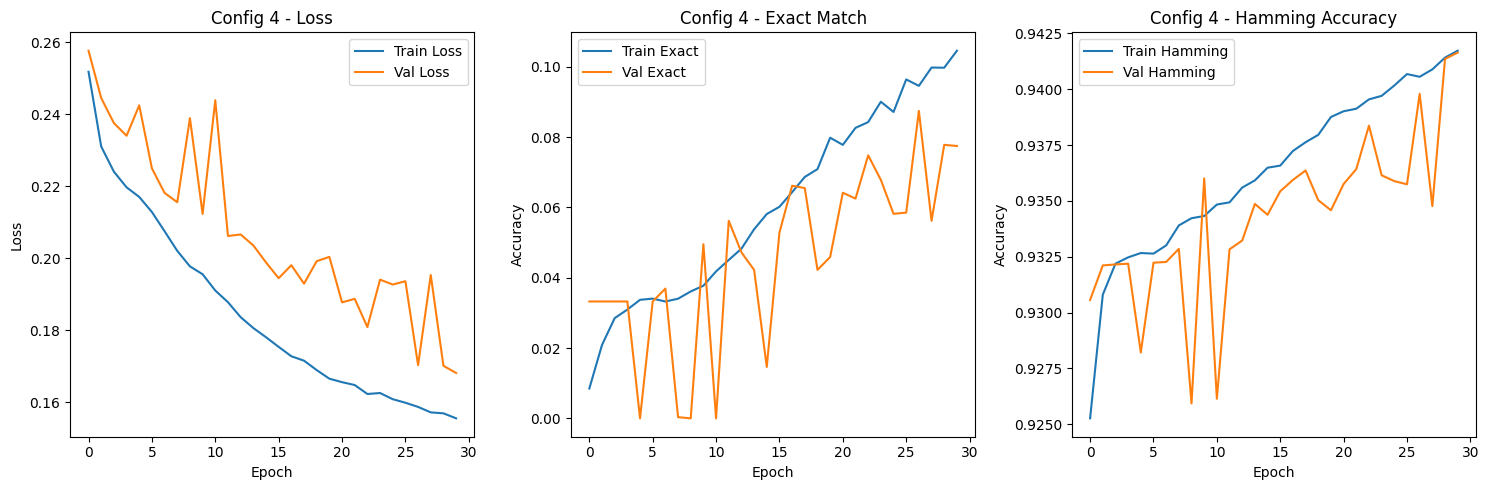


Training with configuration 5: {'lr': 0.001, 'dropout': 0.5, 'optimizer': 'sgd', 'epochs': 30, 'conv_layers': 3}


Epoch 1/30: 100%|██████████| 394/394 [00:05<00:00, 68.15it/s]


Epoch 1/30:
Train Loss: 0.4129, Train Exact: 0.0008, Train Hamming: 0.8601
Val Loss: 0.3848, Val Exact: 0.0000, Val Hamming: 0.9043


Epoch 2/30: 100%|██████████| 394/394 [00:06<00:00, 58.64it/s]


Epoch 2/30:
Train Loss: 0.2875, Train Exact: 0.0000, Train Hamming: 0.9182
Val Loss: 0.3028, Val Exact: 0.0000, Val Hamming: 0.9037


Epoch 3/30: 100%|██████████| 394/394 [00:06<00:00, 57.56it/s]


Epoch 3/30:
Train Loss: 0.2728, Train Exact: 0.0000, Train Hamming: 0.9190
Val Loss: 0.2828, Val Exact: 0.0000, Val Hamming: 0.9035


Epoch 4/30: 100%|██████████| 394/394 [00:06<00:00, 57.65it/s]


Epoch 4/30:
Train Loss: 0.2674, Train Exact: 0.0000, Train Hamming: 0.9195
Val Loss: 0.2816, Val Exact: 0.0000, Val Hamming: 0.9035


Epoch 5/30: 100%|██████████| 394/394 [00:07<00:00, 55.05it/s]


Epoch 5/30:
Train Loss: 0.2650, Train Exact: 0.0000, Train Hamming: 0.9198
Val Loss: 0.2839, Val Exact: 0.0000, Val Hamming: 0.9035


Epoch 6/30: 100%|██████████| 394/394 [00:06<00:00, 57.90it/s]


Epoch 6/30:
Train Loss: 0.2634, Train Exact: 0.0000, Train Hamming: 0.9202
Val Loss: 0.2886, Val Exact: 0.0000, Val Hamming: 0.9035


Epoch 7/30: 100%|██████████| 394/394 [00:06<00:00, 56.33it/s]


Epoch 7/30:
Train Loss: 0.2613, Train Exact: 0.0000, Train Hamming: 0.9204
Val Loss: 0.2902, Val Exact: 0.0000, Val Hamming: 0.9035


Epoch 8/30: 100%|██████████| 394/394 [00:06<00:00, 59.28it/s]


Epoch 8/30:
Train Loss: 0.2604, Train Exact: 0.0000, Train Hamming: 0.9204
Val Loss: 0.2901, Val Exact: 0.0000, Val Hamming: 0.9035


Epoch 9/30: 100%|██████████| 394/394 [00:06<00:00, 60.59it/s]


Early stopping triggered at epoch 9


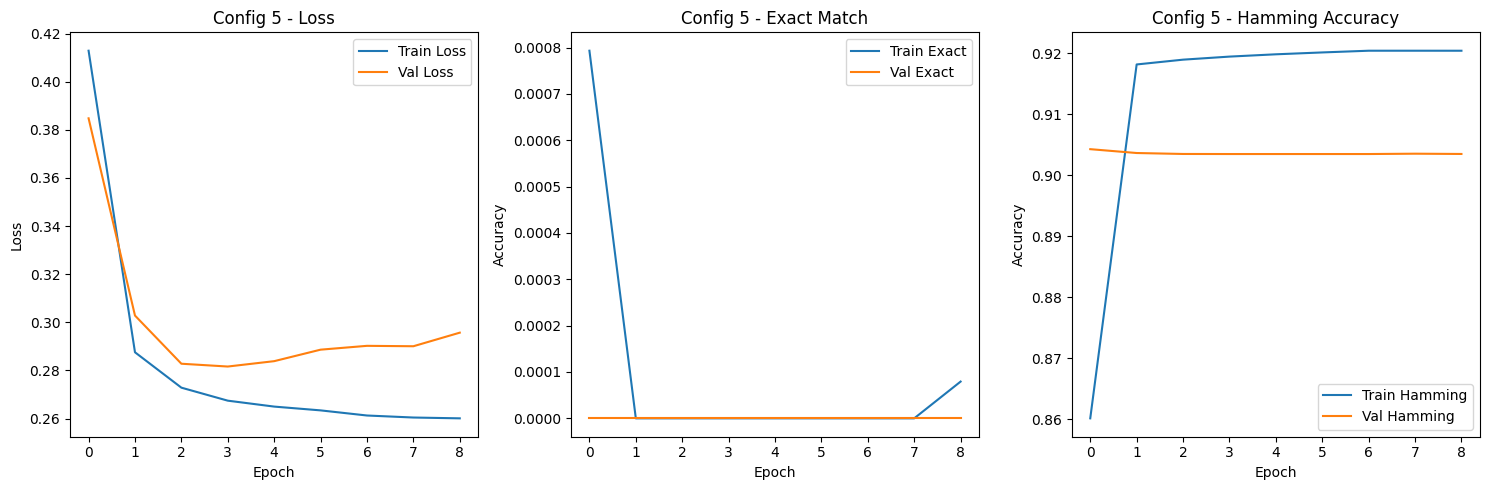


Best Model Performance on Train Set:
Train Loss: 0.0620
Train Exact Match: 0.6295
Train Hamming Accuracy: 0.9819

Best Model Performance on Validation Set:
Val Loss: 0.1194
Val Exact Match: 0.2869
Val Hamming Accuracy: 0.9617

Best Model Performance on Test Set:
Test Loss: 0.1486
Test Exact Match: 0.1970
Test Hamming Accuracy: 0.9571
Best Configuration: {'lr': 0.001, 'dropout': 0.5, 'optimizer': 'adam', 'epochs': 30, 'conv_layers': 3}


In [4]:
def evaluate_model(model, data_loader, criterion, device):
    """Evaluate model on given dataset"""
    model.eval()
    total_loss = 0
    total_exact = 0
    total_hamming = 0
    
    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            predictions = (outputs >= 0.5).float()
            total_loss += loss.item()
            total_exact += (predictions == labels).all(dim=(1, 2)).float().mean().item()
            total_hamming += (1 - hamming_loss(
                labels.cpu().numpy().reshape(-1, labels.shape[1] * labels.shape[2]),
                predictions.cpu().numpy().reshape(-1, predictions.shape[1] * predictions.shape[2])
            ))
    
    num_batches = len(data_loader)
    return (
        total_loss / num_batches,
        total_exact / num_batches,
        total_hamming / num_batches
    )

def plot_metrics(metrics_history, config_num):
    """Plot training and validation metrics"""
    plt.figure(figsize=(15, 5))
    
    # Plot loss
    plt.subplot(1, 3, 1)
    plt.plot(metrics_history['train_loss'], label='Train Loss')
    plt.plot(metrics_history['val_loss'], label='Val Loss')
    plt.title(f'Config {config_num} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    # Plot exact match accuracy
    plt.subplot(1, 3, 2)
    plt.plot(metrics_history['train_exact'], label='Train Exact')
    plt.plot(metrics_history['val_exact'], label='Val Exact')
    plt.title(f'Config {config_num} - Exact Match')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Plot hamming accuracy
    plt.subplot(1, 3, 3)
    plt.plot(metrics_history['train_hamming'], label='Train Hamming')
    plt.plot(metrics_history['val_hamming'], label='Val Hamming')
    plt.title(f'Config {config_num} - Hamming Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.tight_layout()
    plt.savefig(f'config_{config_num}_metrics.png')
    plt.show()
    plt.close()

def train_and_evaluate(model, train_loader, val_loader, config):
    """Train and evaluate model with given configuration"""
    criterion = nn.BCELoss()
    
    if config['optimizer'] == 'adam':
        optimizer = optim.Adam(model.parameters(), lr=config['lr'])
    else:
        optimizer = optim.SGD(model.parameters(), lr=config['lr'], momentum=0.9)
    
    scheduler = ReduceLROnPlateau(optimizer, mode='min', patience=3, factor=0.1)
    
    metrics_history = {
        'train_loss': [], 'val_loss': [],
        'train_exact': [], 'val_exact': [],
        'train_hamming': [], 'val_hamming': []
    }
    
    best_val_loss = float('inf')
    patience = 5
    patience_counter = 0
    
    for epoch in range(config['epochs']):
        # Training phase
        model.train()
        train_loss, train_exact, train_hamming = 0, 0, 0
        
        for images, labels in tqdm(train_loader, desc=f'Epoch {epoch+1}/{config["epochs"]}'):
            images, labels = images.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()
            
            predictions = (outputs >= 0.5).float()
            train_loss += loss.item()
            train_exact += (predictions == labels).all(dim=(1, 2)).float().mean().item()
            train_hamming += (1 - hamming_loss(
                labels.cpu().numpy().reshape(-1, labels.shape[1] * labels.shape[2]),
                predictions.cpu().numpy().reshape(-1, predictions.shape[1] * predictions.shape[2])
            ))
        
        num_batches = len(train_loader)
        train_loss /= num_batches
        train_exact /= num_batches
        train_hamming /= num_batches
        
        # Validation phase
        val_loss, val_exact, val_hamming = evaluate_model(model, val_loader, criterion, device)
        
        # Update learning rate
        scheduler.step(val_loss)
        
        # Store metrics
        metrics_history['train_loss'].append(train_loss)
        metrics_history['val_loss'].append(val_loss)
        metrics_history['train_exact'].append(train_exact)
        metrics_history['val_exact'].append(val_exact)
        metrics_history['train_hamming'].append(train_hamming)
        metrics_history['val_hamming'].append(val_hamming)
        
        # Early stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print(f"Early stopping triggered at epoch {epoch+1}")
                break
        
        # Print progress
        print(f'Epoch {epoch+1}/{config["epochs"]}:')
        print(f'Train Loss: {train_loss:.4f}, Train Exact: {train_exact:.4f}, Train Hamming: {train_hamming:.4f}')
        print(f'Val Loss: {val_loss:.4f}, Val Exact: {val_exact:.4f}, Val Hamming: {val_hamming:.4f}')
    
    return metrics_history

def main():
    # Set random seeds
    torch.manual_seed(42)
    np.random.seed(42)
    
    # Data loading
    transform = transforms.Compose([
        transforms.Resize((28, 28)),
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])
    
    base_dir = '../../data/external/double_mnist'
    train_dataset = MultiLabelMNISTDataset(os.path.join(base_dir, 'train'), transform)
    val_dataset = MultiLabelMNISTDataset(os.path.join(base_dir, 'val'), transform)
    test_dataset = MultiLabelMNISTDataset(os.path.join(base_dir, 'test'), transform)
    
    configs = [
        {'lr': 0.001, 'dropout': 0.5, 'optimizer': 'adam', 'epochs': 30, 'conv_layers': 3},
        {'lr': 0.01, 'dropout': 0.3, 'optimizer': 'sgd', 'epochs': 30, 'conv_layers': 3},
        {'lr': 0.0001, 'dropout': 0.4, 'optimizer': 'adam', 'epochs': 30, 'conv_layers': 3},
        {'lr': 0.005, 'dropout': 0.6, 'optimizer': 'adam', 'epochs': 30, 'conv_layers': 2},
        {'lr': 0.001, 'dropout': 0.5, 'optimizer': 'sgd', 'epochs': 30, 'conv_layers': 3}
    ]
    
    best_val_loss = float('inf')
    best_model_info = None
    
    for i, config in enumerate(configs, 1):
        print(f"\nTraining with configuration {i}: {config}")
        
        train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
        val_loader = DataLoader(val_dataset, batch_size=32)
        
        model = MultiLabelCNN(
            num_conv_layers=config['conv_layers'],
            dropout_rate=config['dropout']
        ).to(device)
        
        metrics_history = train_and_evaluate(model, train_loader, val_loader, config)
        plot_metrics(metrics_history, i)
        
        if min(metrics_history['val_loss']) < best_val_loss:
            best_val_loss = min(metrics_history['val_loss'])
            best_model_info = {
                'model': model.state_dict(),
                'config': config,
                'metrics': metrics_history
            }
    
    # Evaluate best model on train, val, and test sets
    train_loader = DataLoader(train_dataset, batch_size=32)
    val_loader = DataLoader(val_dataset, batch_size=32)
    test_loader = DataLoader(test_dataset, batch_size=32)
    
    best_model = MultiLabelCNN(
        num_conv_layers=best_model_info['config']['conv_layers'],
        dropout_rate=best_model_info['config']['dropout']
    ).to(device)
    best_model.load_state_dict(best_model_info['model'])
    
    criterion = nn.BCELoss()
    
    # Evaluate on train set
    train_loss, train_exact, train_hamming = evaluate_model(best_model, train_loader, criterion, device)
    print("\nBest Model Performance on Train Set:")
    print(f"Train Loss: {train_loss:.4f}")
    print(f"Train Exact Match: {train_exact:.4f}")
    print(f"Train Hamming Accuracy: {train_hamming:.4f}")
    
    # Evaluate on validation set
    val_loss, val_exact, val_hamming = evaluate_model(best_model, val_loader, criterion, device)
    print("\nBest Model Performance on Validation Set:")
    print(f"Val Loss: {val_loss:.4f}")
    print(f"Val Exact Match: {val_exact:.4f}")
    print(f"Val Hamming Accuracy: {val_hamming:.4f}")
    
    # Evaluate on test set
    test_loss, test_exact, test_hamming = evaluate_model(best_model, test_loader, criterion, device)
    print("\nBest Model Performance on Test Set:")
    print(f"Test Loss: {test_loss:.4f}")
    print(f"Test Exact Match: {test_exact:.4f}")
    print(f"Test Hamming Accuracy: {test_hamming:.4f}")
    print(f"Best Configuration: {best_model_info['config']}")

if __name__ == "__main__":
    main()